<a href="https://colab.research.google.com/github/monicagoma/actividades_machine_learning21/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 3 Machine learning

Objetivo: predecir el tipo de tumor (beningno o maligno) en base a atributos de sus células

In [1]:
install.packages("caret")
install.packages("skimr")
install.packages("klaR")
install.packages("kernlab")
install.packages("e1071")
install.packages("moderndive")
install.packages("rpart.plot")
#install.packages("devtools")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘jquerylib’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘proxy’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘R.cache’, ‘e1071’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘snakecase’, ‘operator.

In [2]:
library(devtools)
library(moderndive)
#library(klaR)
library(kernlab)
library(e1071)
library(rpart)
library(rpart.plot)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(caret)
library(skimr)
library(corrplot)

Loading required package: usethis

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘ggplot2’


The following object is masked from ‘package:kernlab’:

    alpha



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.1     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::alpha() masks kernlab::alpha()
✖ purrr::cross()   masks kernlab::cross()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lif

Base de datos: 
- Uniformity of Cell Size       1 - 10
- Uniformity of Cell Shape      1 - 10
- Marginal Adhesion             1 - 10
- Single Epithelial Cell Size   1 - 10
- Bare Nuclei                   1 - 10
- Bland Chromatin               1 - 10
- Normal Nucleoli               1 - 10
- Mitoses                       1 - 10
- Class                       (2 for benign, 4 for malignant)

In [3]:
df_wisconsin <- read.table("breast-cancer-wisconsin.data", sep=",")
colnames(df_wisconsin)<-c("id","cumple_thickness","cell_size","cell_shape","marginal_adhesion",
                          "epithelial_size","bare_nuclei","bland_chromatin","normal_nucleoli","mitoses","class")
head(df_wisconsin)

,id,cumple_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,10,9,7,1,4


### Exploración de datos visual y numérica

In [4]:
df_wisconsin$id <- NULL
df_wisconsin

cumple_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
5,1,1,1,2,1,3,1,1,2
5,4,4,5,7,10,3,2,1,2
3,1,1,1,2,2,3,1,1,2
6,8,8,1,3,4,3,7,1,2
4,1,1,3,2,1,3,1,1,2
8,10,10,8,7,10,9,7,1,4
1,1,1,1,2,10,3,1,1,2
2,1,2,1,2,1,3,1,1,2
2,1,1,1,2,1,1,1,5,2


In [5]:
summary(df_wisconsin)

 cumple_thickness   cell_size        cell_shape     marginal_adhesion
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.000   
 Median : 4.000   Median : 1.000   Median : 1.000   Median : 1.000   
 Mean   : 4.418   Mean   : 3.134   Mean   : 3.207   Mean   : 2.807   
 3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000   
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000   
 epithelial_size  bare_nuclei        bland_chromatin  normal_nucleoli 
 Min.   : 1.000   Length:699         Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   Class :character   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 2.000   Mode  :character   Median : 3.000   Median : 1.000  
 Mean   : 3.216                      Mean   : 3.438   Mean   : 2.867  
 3rd Qu.: 4.000                      3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000                      Max.   :10.000   Max.   :10.000  
    mitoses  

In [6]:
df_wisconsin[1:9] <- lapply(df_wisconsin[1:10], as.numeric)
glimpse(df_wisconsin)

Warning message in lapply(df_wisconsin[1:10], as.numeric):
“NAs introduced by coercion”
Warning message in `[<-.data.frame`(`*tmp*`, 1:9, value = list(cumple_thickness = c(5, :
“provided 10 variables to replace 9 variables”


Rows: 699
Columns: 10
$ cumple_thickness  <dbl> 5, 5, 3, 6, 4, 8, 1, 2, 2, 4, 1, 2, 5, 1, 8, 7, 4, 4…
$ cell_size         <dbl> 1, 4, 1, 8, 1, 10, 1, 1, 1, 2, 1, 1, 3, 1, 7, 4, 1, …
$ cell_shape        <dbl> 1, 4, 1, 8, 1, 10, 1, 2, 1, 1, 1, 1, 3, 1, 5, 6, 1, …
$ marginal_adhesion <dbl> 1, 5, 1, 1, 3, 8, 1, 1, 1, 1, 1, 1, 3, 1, 10, 4, 1, …
$ epithelial_size   <dbl> 2, 7, 2, 3, 2, 7, 2, 2, 2, 2, 1, 2, 2, 2, 7, 6, 2, 2…
$ bare_nuclei       <dbl> 1, 10, 2, 4, 1, 10, 10, 1, 1, 1, 1, 1, 3, 3, 9, 1, 1…
$ bland_chromatin   <dbl> 3, 3, 3, 3, 3, 9, 3, 3, 1, 2, 3, 2, 4, 3, 5, 4, 2, 3…
$ normal_nucleoli   <dbl> 1, 2, 1, 7, 1, 7, 1, 1, 1, 1, 1, 1, 4, 1, 5, 3, 1, 1…
$ mitoses           <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 4, 1, 1, 1…
$ class             <int> 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2…


In [7]:
df_wisconsin <- na.omit(df_wisconsin) 
df_wisconsin

,cumple_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2
5,4,1,1,3,2,1,3,1,1,2
6,8,10,10,8,7,10,9,7,1,4
7,1,1,1,1,2,10,3,1,1,2
8,2,1,2,1,2,1,3,1,1,2
9,2,1,1,1,2,1,1,1,5,2


In [8]:
df_wisconsin$class <- as.factor(df_wisconsin$class)

In [9]:
skim(df_wisconsin)

── Data Summary ────────────────────────
                           Values      
Name                       df_wisconsin
Number of rows             683         
Number of columns          10          
_______________________                
Column type frequency:                 
  factor                   1           
  numeric                  9           
________________________               
Group variables            None        

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts    
1 class                 0             1 FALSE          2 2: 444, 4: 239

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable     n_missing complete_rate  mean    sd    p0   p25   p50   p75
1 cumple_thickness          0             1  4.44  2.82     1     2     4     6
2 cell_size                 0             1  3.15  3.07     1     1     1     5
3 cell_shap

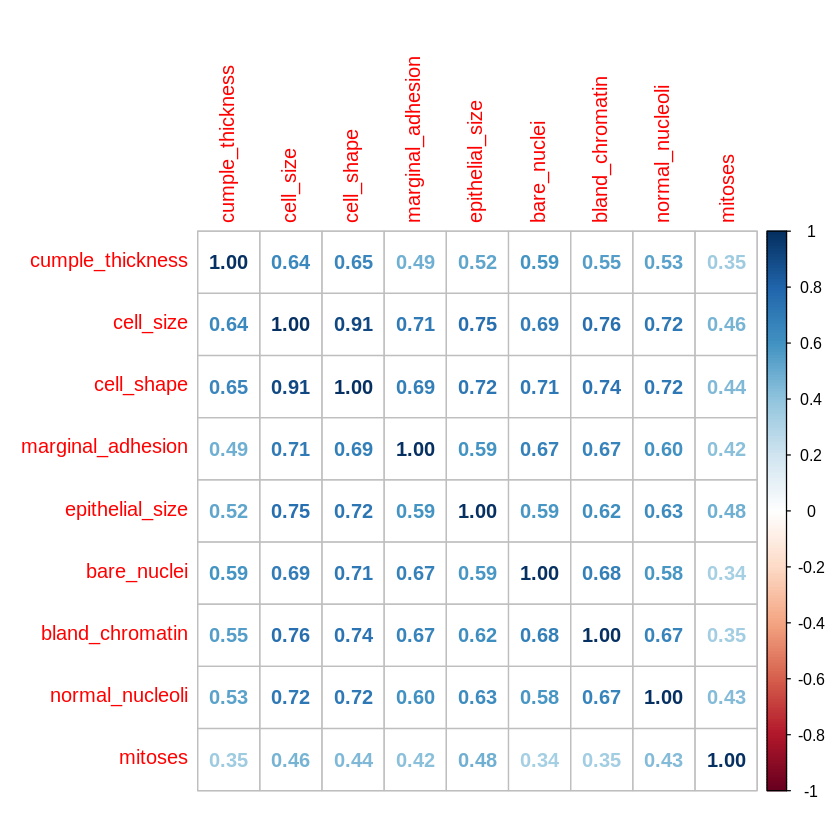

In [10]:
M <- cor(df_wisconsin[1:9])
corrplot(M, method="number")

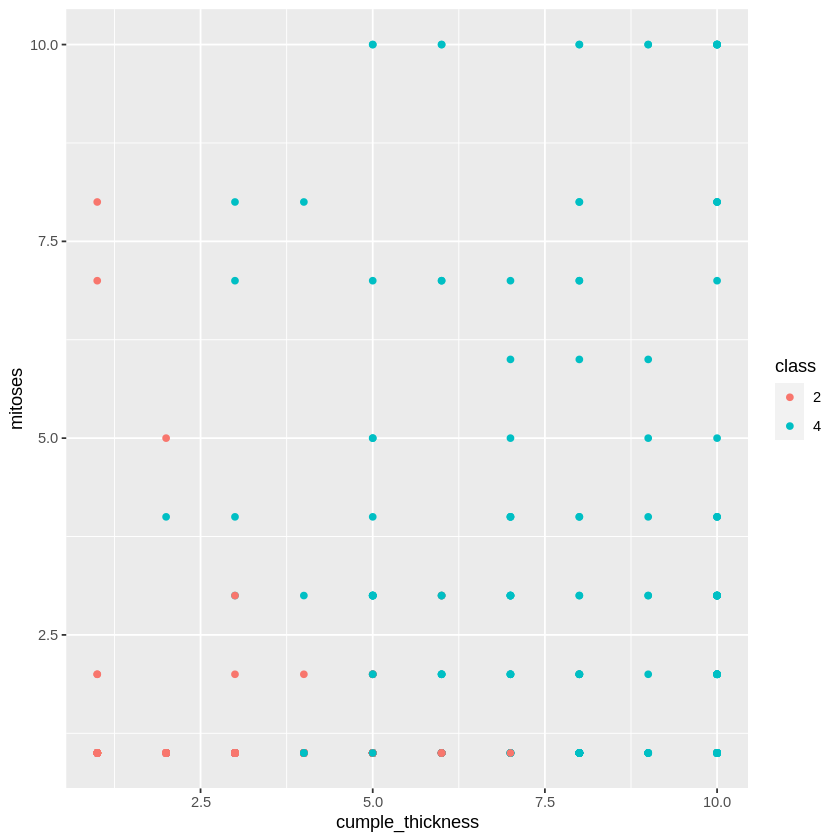

In [11]:
#plot class and cumple_thickness
ggplot(df_wisconsin, aes(x = cumple_thickness, y = mitoses, color = class)) + geom_point()

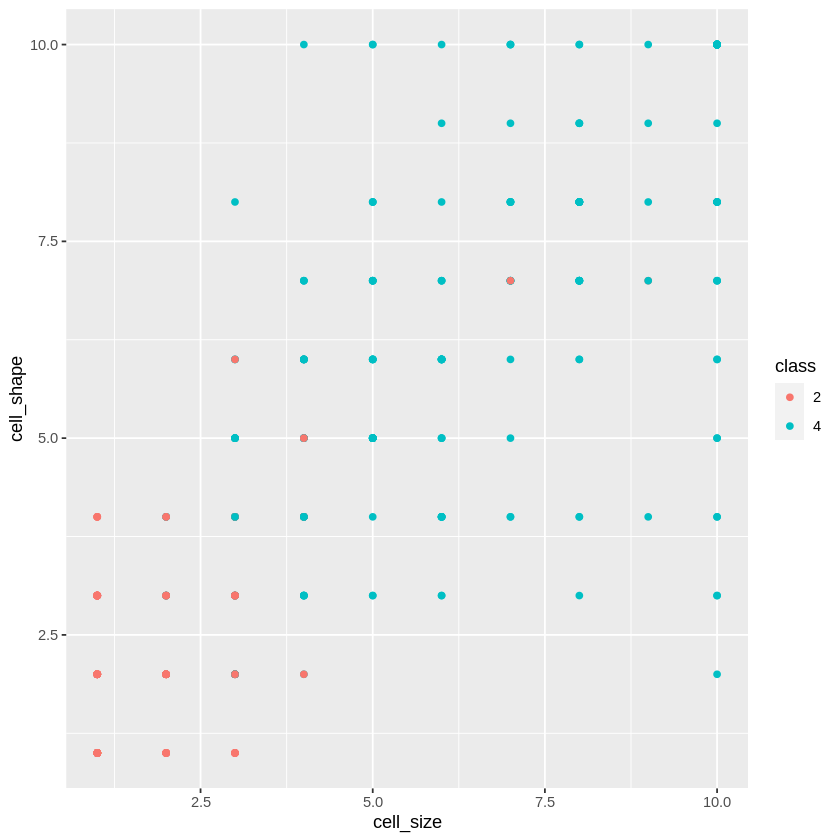

In [12]:
ggplot(df_wisconsin, aes(x = cell_size, y = cell_shape, color = class)) + geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



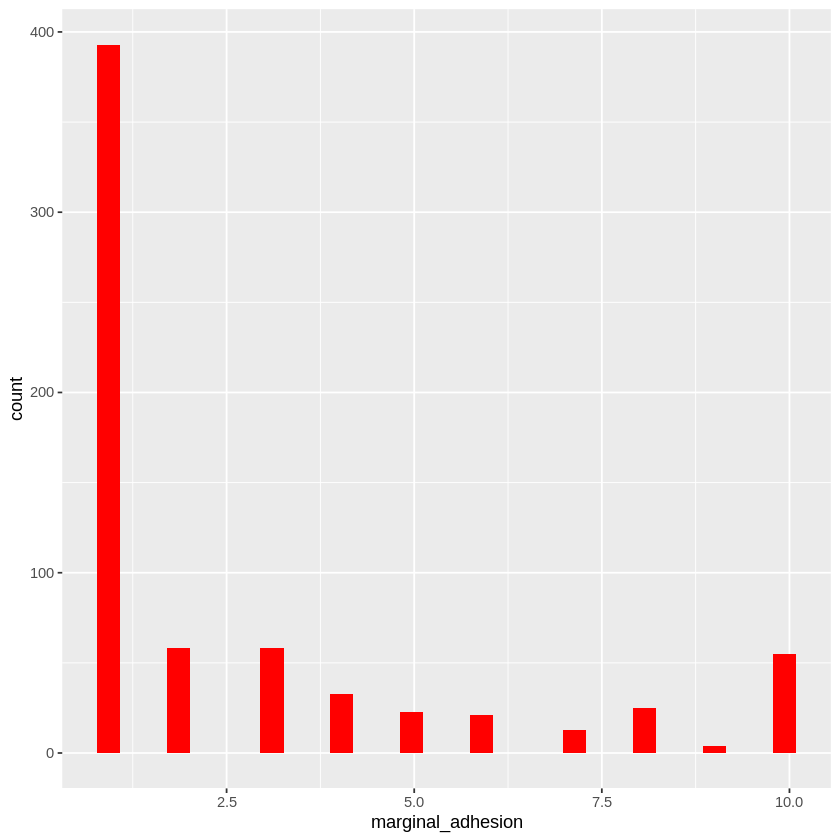

In [13]:
ggplot(df_wisconsin, aes(x = marginal_adhesion)) + geom_histogram( fill = 'red')

## Aplicación de modelos supervisados y no supervisados

- Regresión logística
- SVM
- Naive Bayes
- Hierarchical Clustering
- k-means 
- kNN
- Classification Tress
- Bagged Trees 
- Random Forests 
- Neural Network

### Regresión Logística

In [14]:
#randomly order the rows
set.seed(100)
data_random <- df_wisconsin%>%
  sample_frac( size = 1, replace = FALSE)
#split train/test set 
train_data <- data_random %>%
  slice(1:450)
test_data <- data_random %>%
slice(451:683)

In [15]:
#build logistic regression
model_glm <- glm(class ~., data = train_data, family = "binomial")
summary(model_glm)


Call:
glm(formula = class ~ ., family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7982  -0.0878  -0.0446   0.0087   1.6029  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -10.90542    1.72001  -6.340 2.29e-10 ***
cumple_thickness    0.53892    0.18156   2.968 0.002995 ** 
cell_size          -0.30799    0.31290  -0.984 0.324977    
cell_shape          0.57655    0.34576   1.667 0.095420 .  
marginal_adhesion   0.40851    0.15095   2.706 0.006804 ** 
epithelial_size    -0.04861    0.20927  -0.232 0.816304    
bare_nuclei         0.44880    0.12566   3.571 0.000355 ***
bland_chromatin     0.39902    0.23544   1.695 0.090111 .  
normal_nucleoli     0.43125    0.19171   2.250 0.024477 *  
mitoses             0.74964    0.42366   1.769 0.076823 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null devi

In [16]:
lenPre <- predict(model_glm, test_data)
lenPre

1           2           3           4           5           6 
-3.57870577 -5.74218164 -6.91130084 -7.75795140  6.33163353 -3.65115102 
          7           8           9          10          11          12 
 5.54319284  3.90596224 -3.18689051 -3.49294097  4.81994023  4.31675255 
         13          14          15          16          17          18 
-4.80424595  6.26557595 -4.66434756 -4.74613794 -5.33372934 -6.86862899 
         19          20          21          22          23          24 
 8.12175004 -5.88208003 -6.95991411 -5.88208003 -4.21825786  7.53805468 
         25          26          27          28          29          30 
-4.80424595  6.21134939 -4.97382922 -4.43935852 16.74807177 -6.95991411 
         31          32          33          34          35          36 
-6.42099707 -5.24360830  6.35963600  9.45591937 -7.75795140 -3.94353224 
         37          38          39          40          41          42 
 0.80122390 -1.92183789 -5.43328404 -1.05636085 -2.38432819  7.75729751 
         43          44          45          46          47          48 
 3.26505123 -7.35893276 -5.88208003 -5.34316299 -2.60796126 -4.26532892 
         49          50          51          52          53          54 
-4.77201010 10.65870931 -5.20326460  7.83447878  8.41765707  8.68910568 
         55          56          57          58          59          60 
-3.33551908 11.24764203 -7.10575392 -7.09037188  0.08101241 -4.75563269 
         61          62          63          64          65          66 
-7.35893276  5.79328255 15.23512636  5.26933476  7.20348336 -7.54365143 
         67          68          69          70          71          72 
 7.53936004  7.11172853 -6.68011732 -6.81052097  4.90420927 -7.75795140 
         73          74          75          76          77          78 
-6.28109868 -7.21903436 -5.01643998 -5.34316299 -6.42099707 -6.28109868 
         79          80          81          82          83          84 
-7.35893276 -6.42099707 10.86688332 15.55101584 -6.14120029 -5.70455121 
         85          86          87          88          89          90 
 5.12069072 -6.95991411 -2.49748337  3.81283787  7.01723521 -4.95047492 
         91          92          93          94          95          96 
-5.42385039 -6.95991411 -6.04333263 -4.80424595  1.80327532  1.26376957 
         97          98          99         100         101         102 
-6.32971195 -6.91013676  1.80327532 -5.60228325 -0.47300636 -6.95991411 
        103         104         105         106         107         108 
-4.87654158 -6.37238380 -6.82001572 11.77421074 -6.68011732  2.88446614 
        109         110         111         112         113         114 
-7.75795140 -7.75795140 -6.68011732 -7.70933813 -4.52613621 -4.80424595 
        115         116         117         118         119         120 
-7.75795140 -5.45082554  8.13235804 -6.05016822 -6.14120029 -6.60485647 
        121         122         123         124         125         126 
-7.21903436 -5.20326460  3.99782584 -7.35893276 -5.74218164 -6.27160393 
        127         128         129         130         131         132 
 3.55048949 -3.08135761  8.80584514 -4.09493583 -7.75795140  7.12477374 
        133         134         135         136         137         138 
 0.25074757  4.65397728  9.36796881 -5.88208003 -6.68011732 -7.75795140 
        139         140         141         142         143         144 
 2.30311522 -5.20326460 -6.95991411  6.26557595 -4.22769849 -6.95991411 
        145         146         147         148         149         150 
-4.62671713  7.82041926 -7.75795140 -5.62929036 -7.75795140 -1.90540588 
        151         152         153         154         155         156 
 0.60133248  5.13103122  7.81398927 -6.14120029 -6.55140072 -6.95991411 
        157         158         159         160         161         162 
 7.34213444 -7.88362080 -6.82001572 -7.30082474 -6.68011732 -5.96276743 
        163         164         165         166         167         

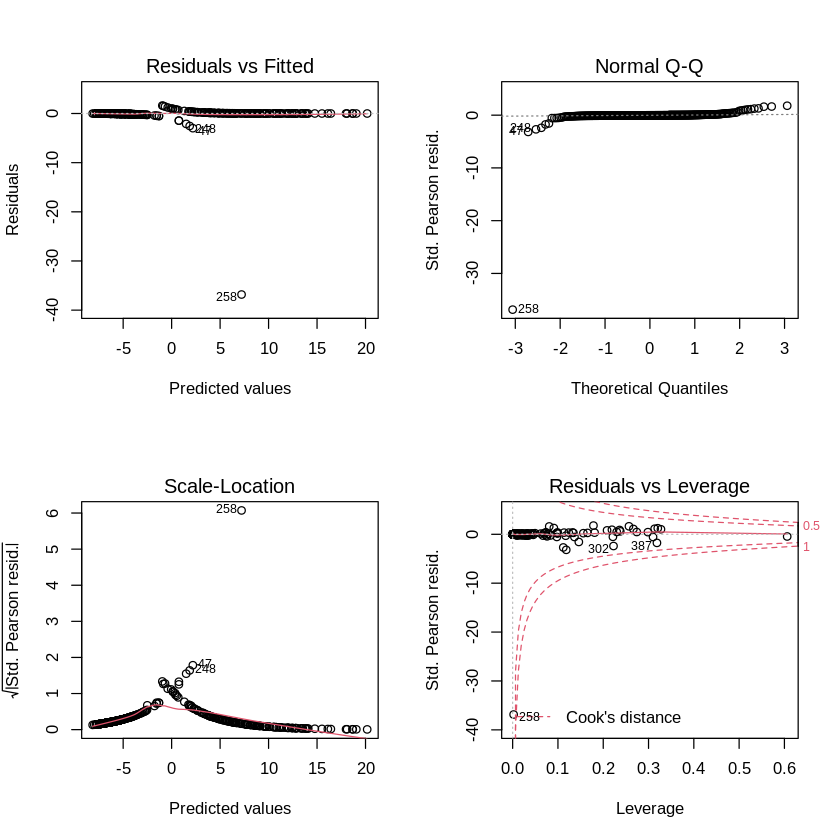

In [17]:
par(mfrow = c(2, 2)) 
plot(model_glm)

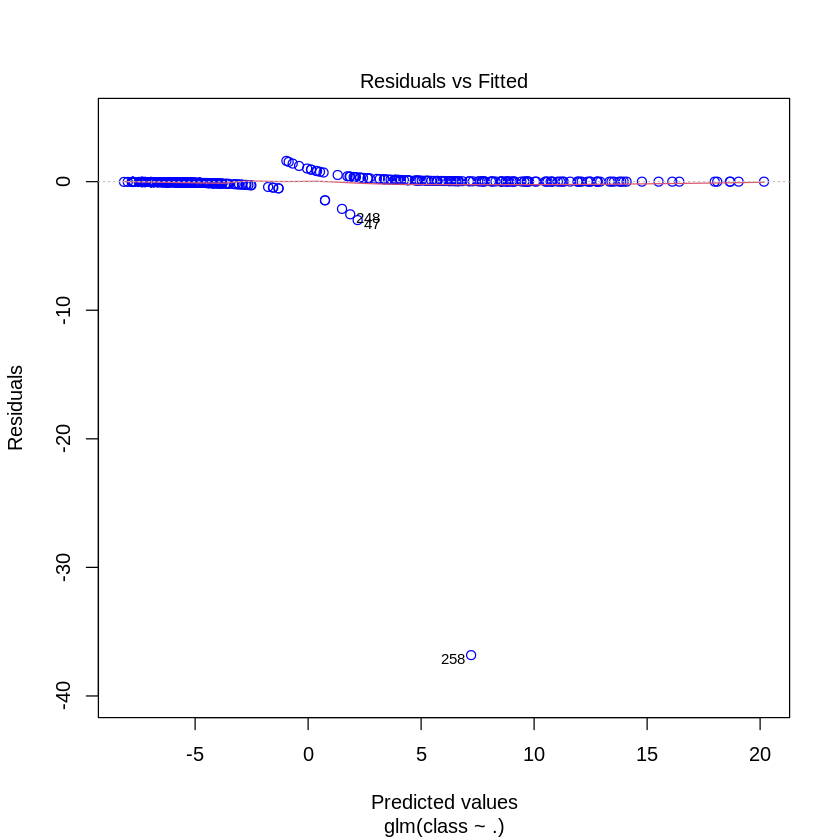

In [18]:
plot(model_glm,which=1, col=c("blue"))

In [19]:
#evaluate model
pred_act <- data.frame(cbind(actual=test_data$class, predicted=lenPre)) 

correlation_accuracy <- cor(pred_act)
correlation_accuracy


,actual,predicted
actual,1.0000000,0.8895395
predicted,0.8895395,1.0000000


In [20]:
#see table confidence intervals 
confint(model_glm)

Waiting for profiling to be done...

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


,2.5 %,97.5 %
(Intercept),-15.06820017,-8.1191355
cumple_thickness,0.21177240,0.9438887
cell_size,-0.92233450,0.3123938
cell_shape,-0.09209310,1.2780081
marginal_adhesion,0.12319915,0.7325005
epithelial_size,-0.46293813,0.3684778
bare_nuclei,0.21721821,0.7189019
bland_chromatin,-0.06389721,0.8756379
normal_nucleoli,0.06993631,0.8306091
mitoses,0.03409467,1.4627213


### Support Vector Machine

In [21]:
#randomly order the rows
set.seed(12345)
allrows <- 1:nrow(df_wisconsin)
trainrows <- sample(allrows, replace = FALSE, size = 0.7*length(allrows))
#split traint/test
train_df <- df_wisconsin[trainrows, 1:10]  
train_label <- df_wisconsin[trainrows, 10]
test_df <- df_wisconsin[-trainrows, 1:10] 
test_label <- df_wisconsin[-trainrows, 10]

In [22]:
TrainCtrl <- trainControl(method = "cv", number = 5,verbose = FALSE)
grid <- expand.grid(C = c(0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5))
svm_linear <- train(class ~., 
                    data = train_df, 
                    method = "svmLinear",
                    trControl=TrainCtrl, 
                    tuneGrid = grid, 
                    tuneLength = 10)
svm_linear

Support Vector Machines with Linear Kernel 

478 samples
  9 predictor
  2 classes: '2', '4' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 382, 383, 382, 383, 382 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.01  0.9706798  0.9363525
  0.05  0.9706579  0.9365585
  0.10  0.9727632  0.9412848
  0.25  0.9727851  0.9412454
  0.50  0.9727851  0.9412454
  0.75  0.9727851  0.9412454
  1.00  0.9727851  0.9412454
  1.25  0.9727851  0.9412454
  1.50  0.9727851  0.9412454

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was C = 0.25.

In [23]:
test_pred <- predict(svm_linear, newdata = test_df)
test_pred

[1] 4 4 2 2 2 4 2 4 2 2 4 4 4 4 4 2 4 4 2 2 2 4 2 2 2 2 4 4 2 2 4 2 2 4 2 2 4
 [38] 2 2 2 2 4 2 2 2 2 2 2 2 4 4 4 4 4 4 4 2 2 4 2 2 2 4 4 2 4 4 4 4 4 4 2 4 2
 [75] 2 4 2 4 4 2 2 2 4 4 2 4 2 2 2 2 4 2 4 2 4 4 2 4 2 2 2 4 4 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 4 2 4 4 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 4 2 2 4 4 4 2 2 2 4 2 2 2 2
[186] 2 2 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2
Levels: 2 4

In [24]:
confusionMatrix(test_pred, test_df$class)

Confusion Matrix and Statistics

          Reference
Prediction   2   4
         2 135   3
         4   4  63
                                          
               Accuracy : 0.9659          
                 95% CI : (0.9309, 0.9862)
    No Information Rate : 0.678           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9221          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9712          
            Specificity : 0.9545          
         Pos Pred Value : 0.9783          
         Neg Pred Value : 0.9403          
             Prevalence : 0.6780          
         Detection Rate : 0.6585          
   Detection Prevalence : 0.6732          
      Balanced Accuracy : 0.9629          
                                          
       'Positive' Class : 2               
                              

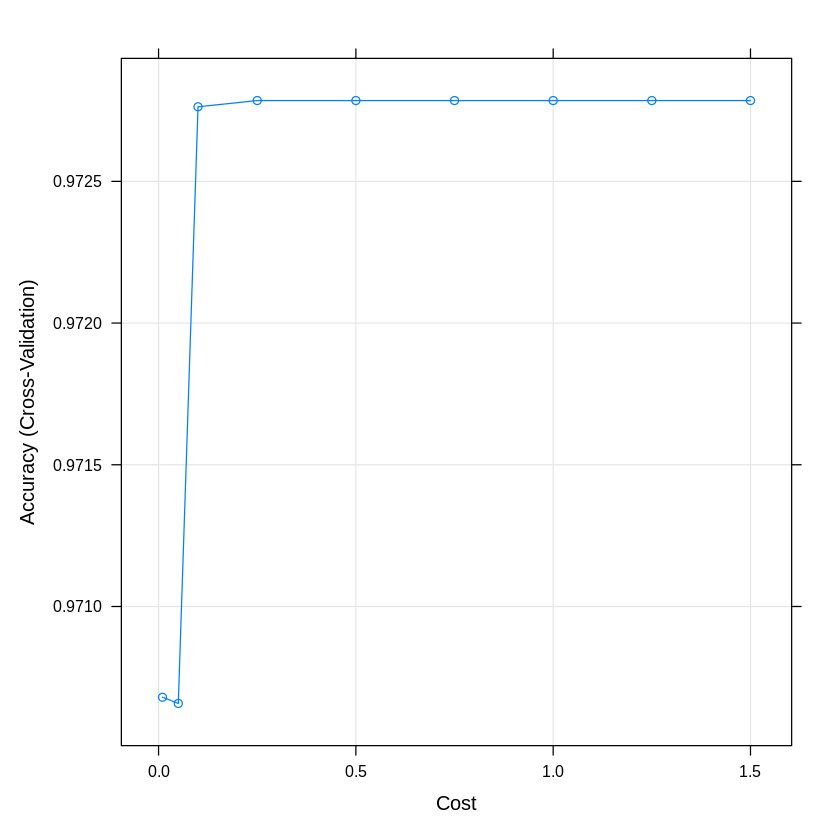

In [25]:
plot(svm_linear)

### Naive Bayes

In [26]:
install.packages("naivebayes") 
library(naivebayes)
naive_fit <- naive_bayes(class ~., data = train_df)

naive_fit

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

naivebayes 0.9.7 loaded




================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = class ~ ., data = train_df)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

        2         4 
0.6380753 0.3619247 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: cumple_thickness (Gaussian) 
--------------------------------------------------------------------------------- 
                
cumple_thickness        2        4
            mean 2.983607 7.052023
            sd   1.702280 2.295764

--------------------------------------------------------------------------------- 
 ::: cell_size (Gaussian) 
--------------------------------------------------------

In [27]:
#predict the class based on the new data.
test_df$pred <- predict(naive_fit, newdata = test_df) 
#get confusion matrix
tab_cm <- table(test_df$pred, test_df$class)
tab_cm

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


   
      2   4
  2 132   1
  4   7  65

In [28]:
mean(test_df$class == test_df$pred)

[1] 0.9609756

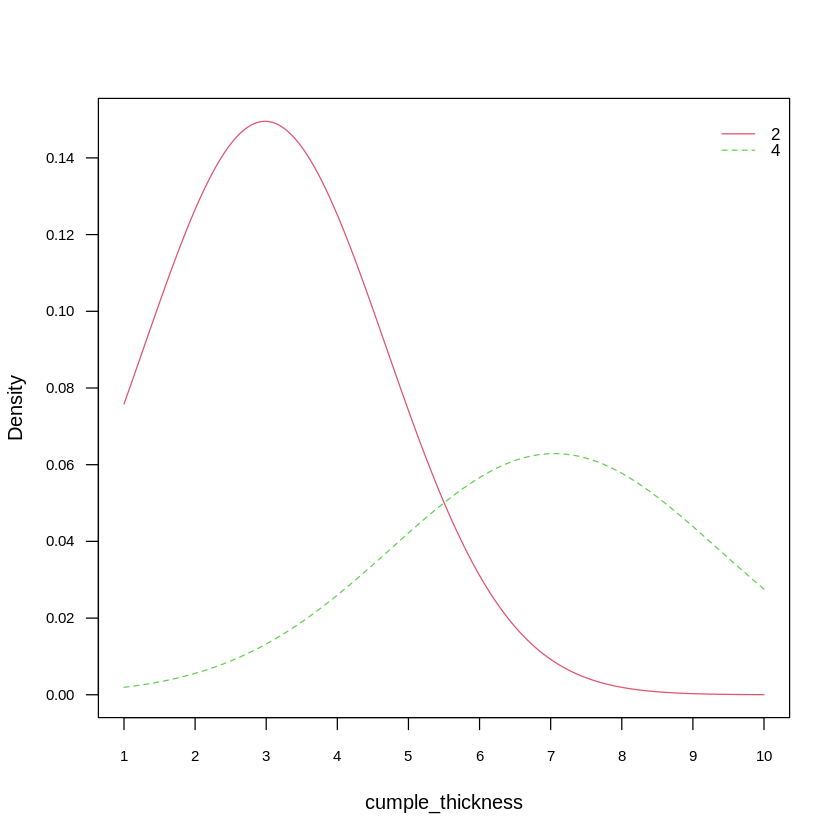

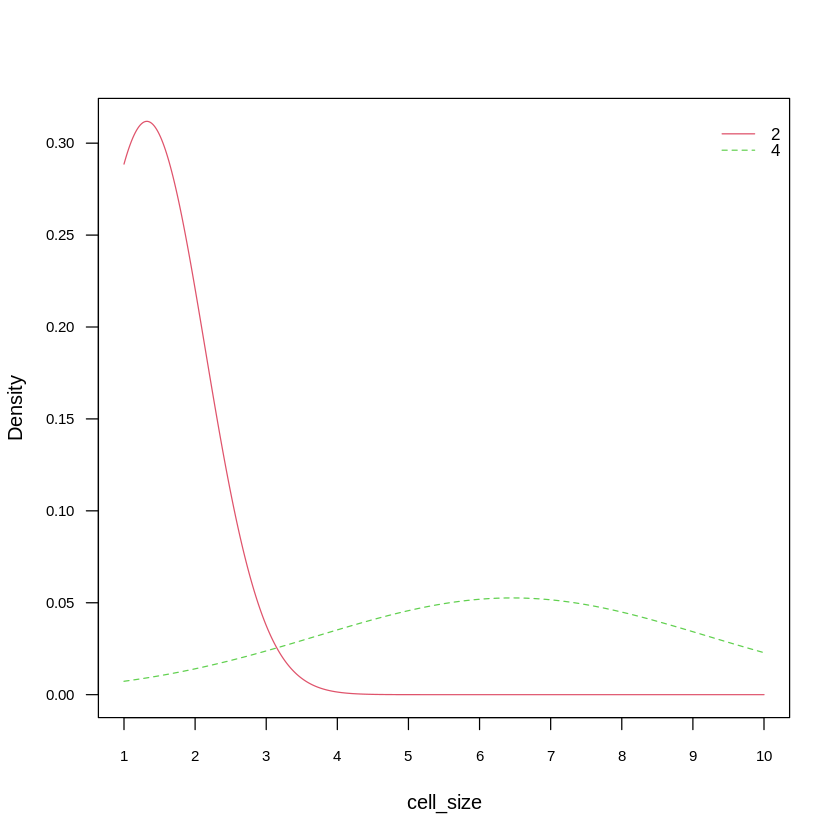

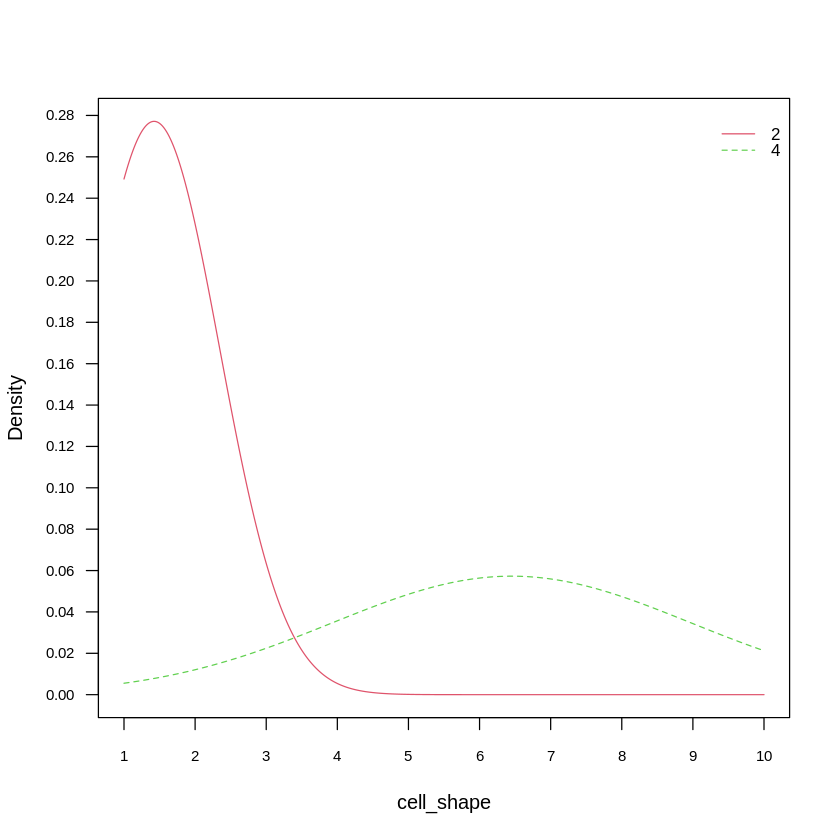

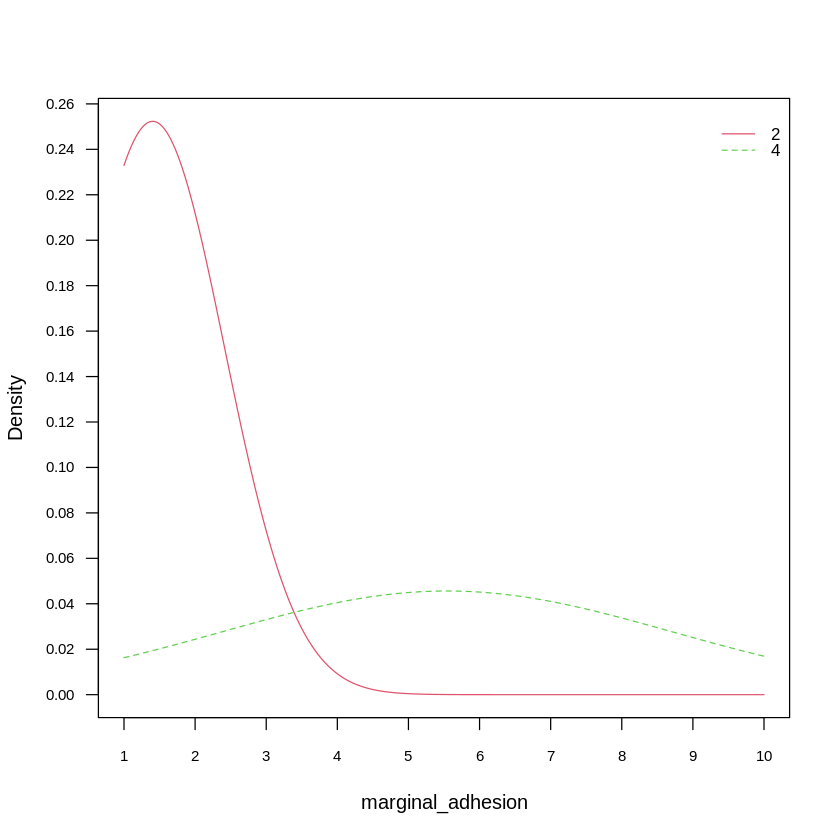

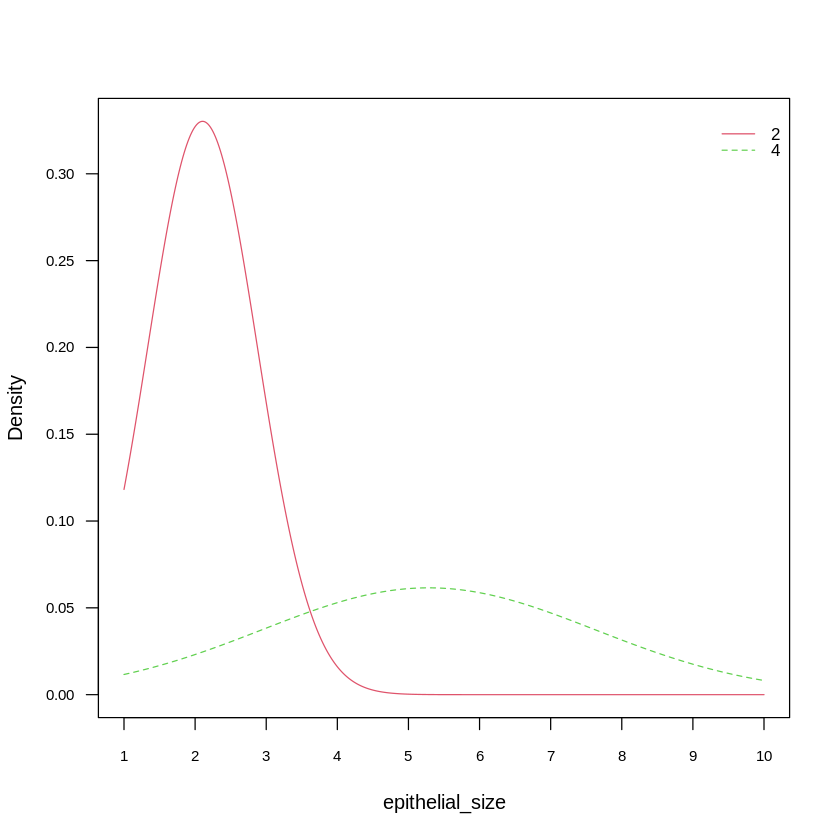

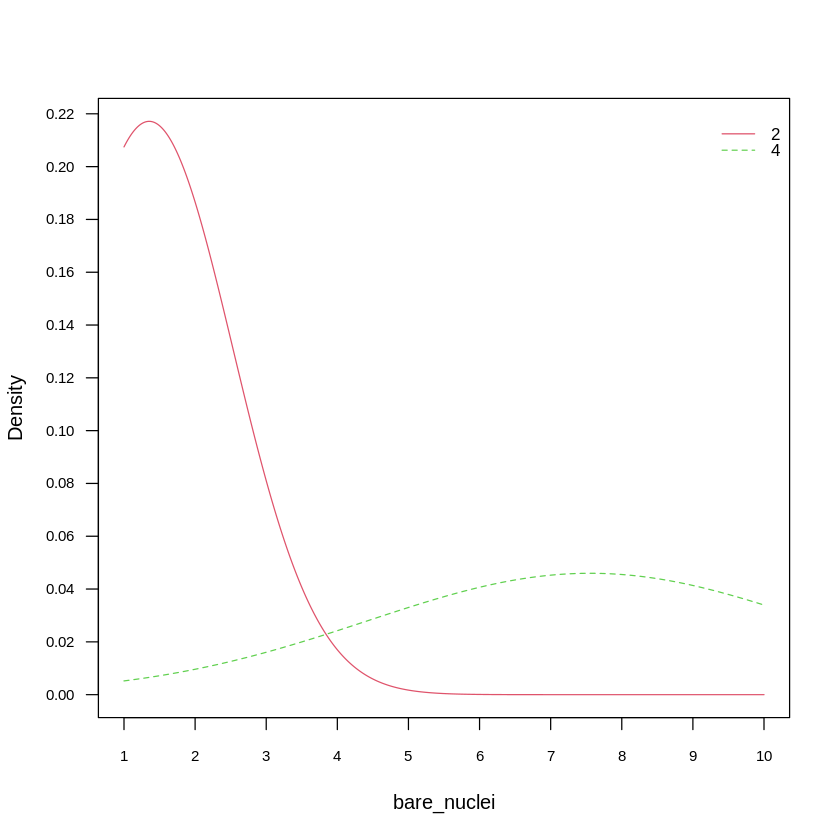

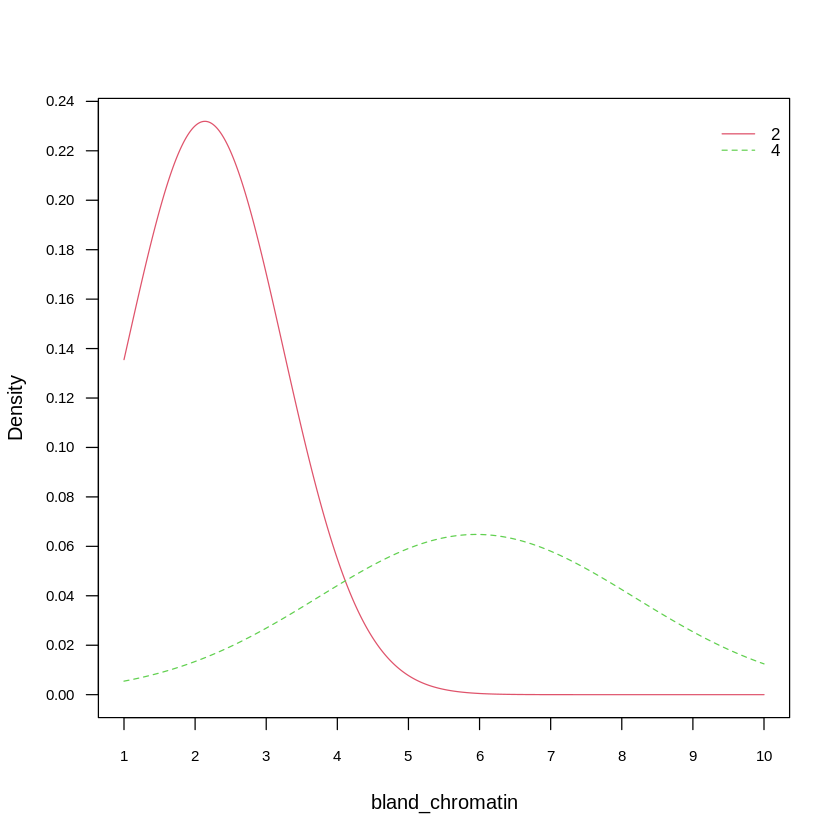

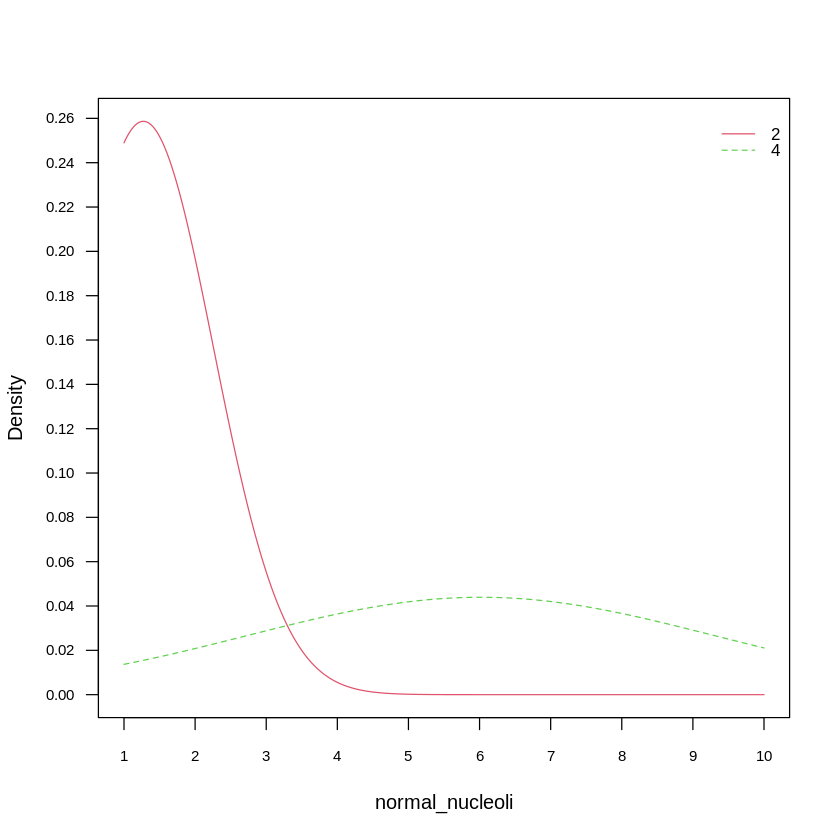

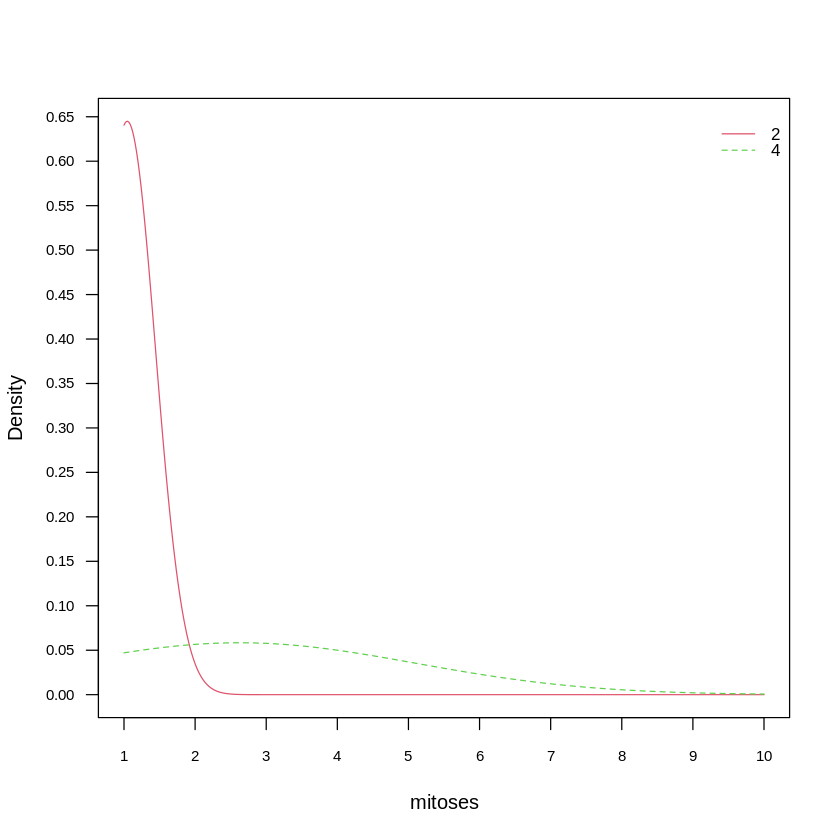

In [29]:
plot(naive_fit)

### K-Nearest Neighbors

In [30]:
knn_fit <- train(class ~., data = train_df, method = 'knn', trControl = TrainCtrl)
knn_fit

k-Nearest Neighbors 

478 samples
  9 predictor
  2 classes: '2', '4' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 382, 382, 383, 383, 382 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9707675  0.9367482
  7  0.9686842  0.9323878
  9  0.9687061  0.9323003

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

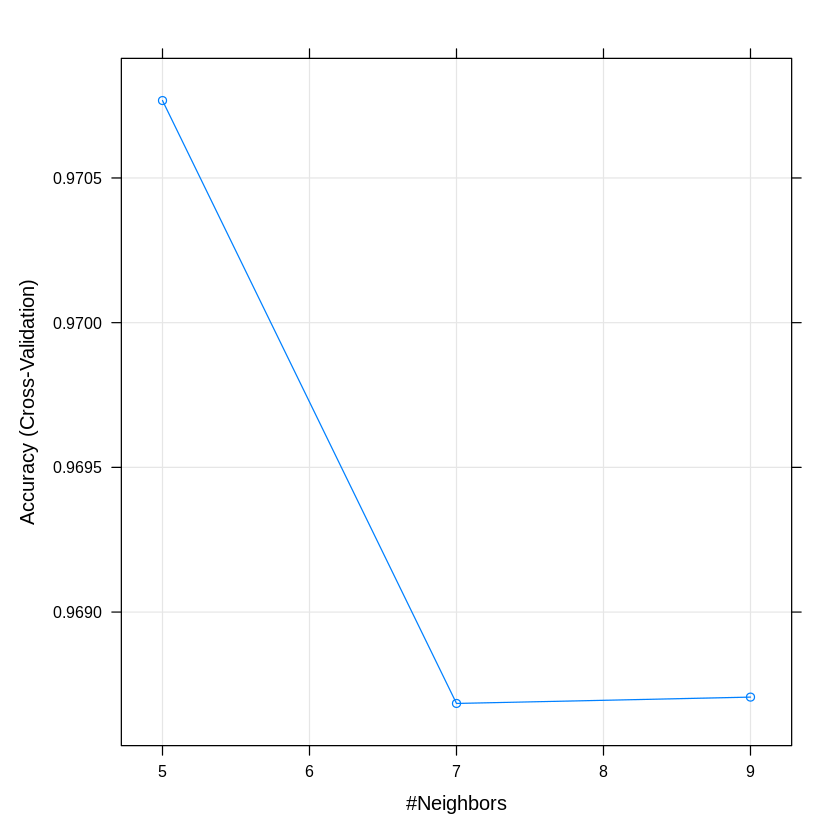

In [31]:
plot(knn_fit)

In [32]:
pred_knn <- predict(knn_fit, newdata = test_df)
pred_knn

[1] 4 4 2 2 2 4 2 4 2 2 2 4 4 4 4 2 4 4 2 2 2 4 2 2 2 2 4 4 2 2 4 2 2 4 2 2 4
 [38] 2 2 2 2 4 2 2 2 2 2 2 2 4 4 4 4 4 4 4 2 2 4 2 2 2 4 4 2 4 4 4 4 4 4 2 4 2
 [75] 2 4 2 4 4 2 2 2 4 4 2 4 2 2 2 2 4 2 4 2 4 4 2 4 2 2 2 4 4 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 4 2 4 4 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 4 2 2 4 4 4 2 2 2 4 2 2 2 2
[186] 2 2 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2
Levels: 2 4

In [33]:
confusionMatrix(pred_knn, test_df$class)

Confusion Matrix and Statistics

          Reference
Prediction   2   4
         2 135   3
         4   4  63
                                          
               Accuracy : 0.9659          
                 95% CI : (0.9309, 0.9862)
    No Information Rate : 0.678           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9221          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9712          
            Specificity : 0.9545          
         Pos Pred Value : 0.9783          
         Neg Pred Value : 0.9403          
             Prevalence : 0.6780          
         Detection Rate : 0.6585          
   Detection Prevalence : 0.6732          
      Balanced Accuracy : 0.9629          
                                          
       'Positive' Class : 2               
                              

In [34]:
mean(pred_knn == test_df$class)

[1] 0.9658537

### k- means

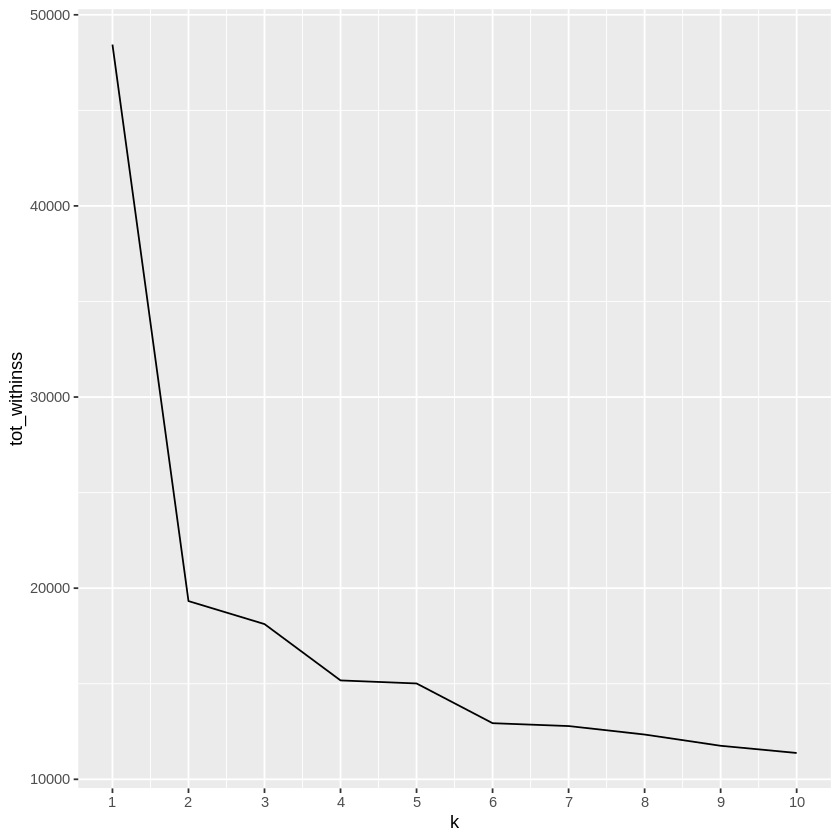

In [35]:
#build k means model 
library(cluster)
tot_withinss <- map_dbl(1:10, function(k){ 
  model_kmeans <- kmeans(x = df_wisconsin[,1:9], centers = k) 
  model_kmeans$tot.withinss
})
elbow_df <- data.frame(
  k = 1:10,
  tot_withinss = tot_withinss
)
ggplot(elbow_df, aes(x = k, y = tot_withinss)) + 
geom_line() +
scale_x_continuous(breaks = 1:10)

In [36]:
kmeans_model <- kmeans(df_wisconsin[,1:9], centers = 3, nstart = 5)
kmeans_model

K-means clustering with 3 clusters of sizes 442, 118, 123

Cluster means:
  cumple_thickness cell_size cell_shape marginal_adhesion epithelial_size
1         2.941176  1.251131   1.361991          1.314480        2.061086
2         7.313559  4.762712   5.016949          4.457627        4.169492
3         7.081301  8.430894   8.146341          6.715447        6.552846
  bare_nuclei bland_chromatin normal_nucleoli  mitoses
1    1.271493        2.058824        1.221719 1.070136
2    8.211864        4.974576        4.042373 1.737288
3    7.235772        6.959350        7.666667 3.390244

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   2   1   2   1   3   1   1   1   1   1   1   1   1   3   2   1   1   2   1 
 21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  42 
  2   2   1   1   2   1   1   1   1   1   1   3   1   1   1   3   1   2   2   2 
 43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  5

In [37]:
#extract cluster assignment vector
cluster_3 <- kmeans_model$cluster
df_km3 <- mutate(df_wisconsin, cluster = cluster_3) 

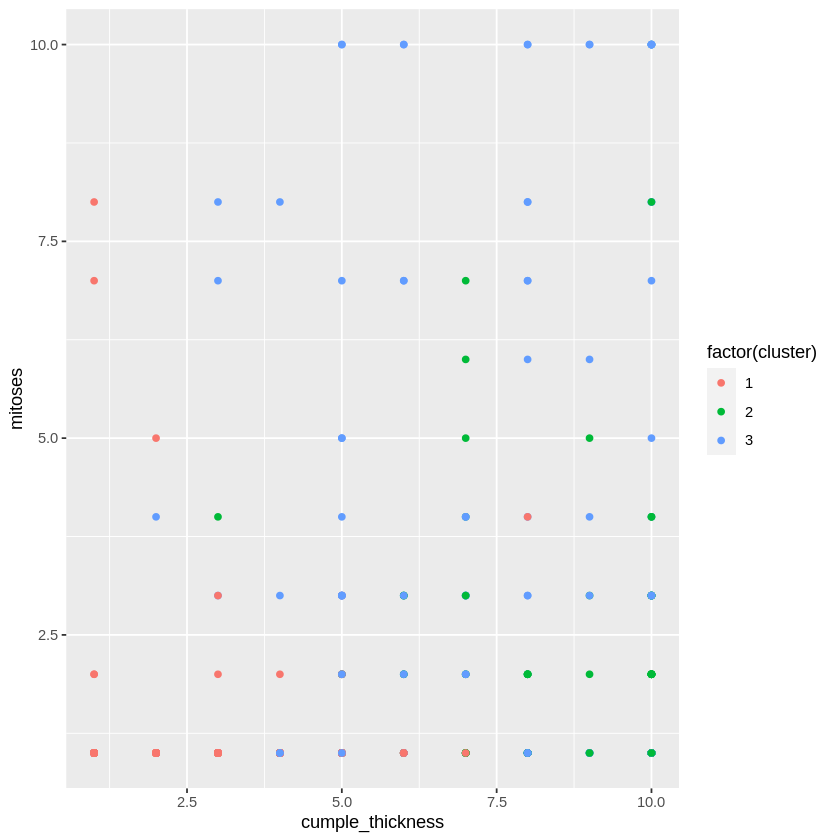

In [38]:
ggplot(df_km3, aes(x = cumple_thickness, y = mitoses, color = factor(cluster))) +
geom_point()

In [39]:
table(cluster_3, df_wisconsin$class)

         
cluster_3   2   4
        1 433   9
        2  11 107
        3   0 123

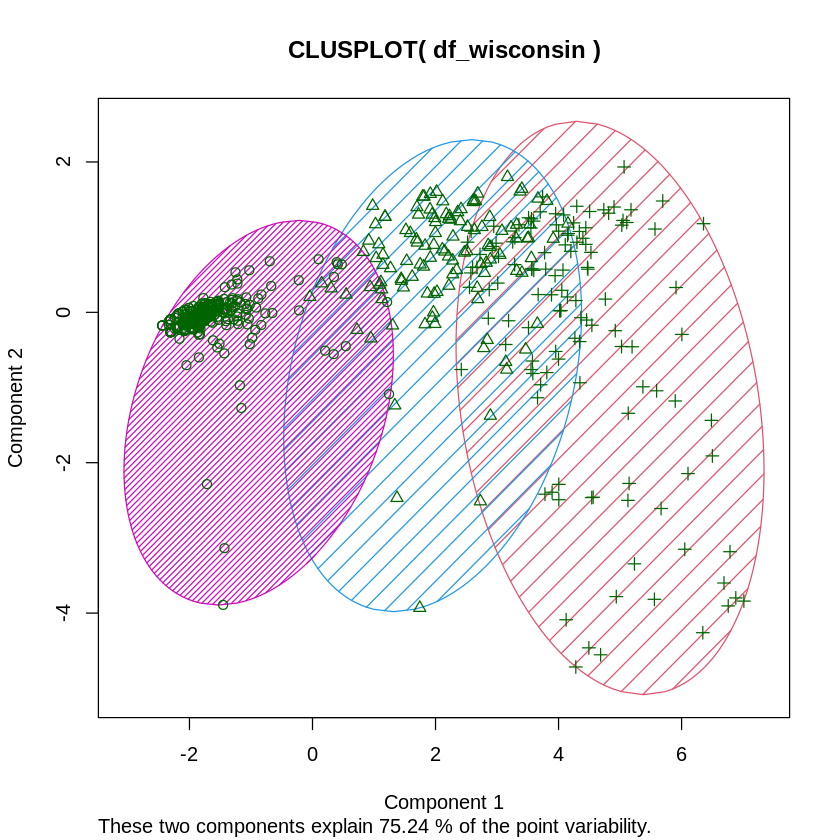

In [40]:
 clusplot(df_wisconsin, cluster_3, color=T, shade=T, labels=0, lines=0)

In [41]:
#build model of two clusters
kmeans_2 <- kmeans(df_wisconsin[,1:9], centers = 2, nstart = 5)
kmeans_2
#extract cluster assignment vector
cluster_2 <- kmeans_2$cluster
df_km2 <- mutate(df_wisconsin, cluster = cluster_2) 

K-means clustering with 2 clusters of sizes 230, 453

Cluster means:
  cumple_thickness cell_size cell_shape marginal_adhesion epithelial_size
1         7.173913  6.800000   6.734783          5.739130        5.478261
2         3.055188  1.298013   1.428256          1.353201        2.094923
  bare_nuclei bland_chromatin normal_nucleoli  mitoses
1    7.930435        6.108696        6.039130 2.569565
2    1.317881        2.092715        1.260486 1.112583

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   1   2   1   2   1   2   2   2   2   2   2   2   2   1   2   2   2   1   2 
 21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  42 
  1   1   2   2   2   2   2   2   2   2   2   1   2   2   2   1   2   1   1   1 
 43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62 
  1   1   1   2   1   2   2   1   2   2   1   1   1   1   1   2   1   2   1   2 
 63  64  65  66  67  68  69  70  71  7

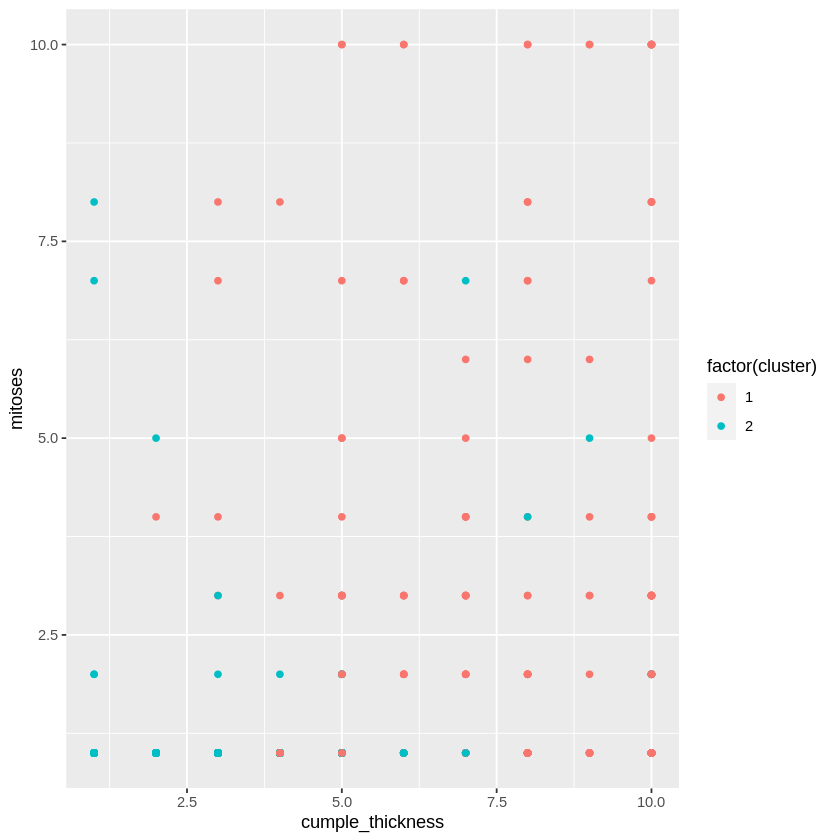

In [42]:
ggplot(df_km2, aes(x = cumple_thickness, y = mitoses, color = factor(cluster))) +
geom_point()

In [43]:
table(cluster_2, df_wisconsin$class)

         
cluster_2   2   4
        1   9 221
        2 435  18

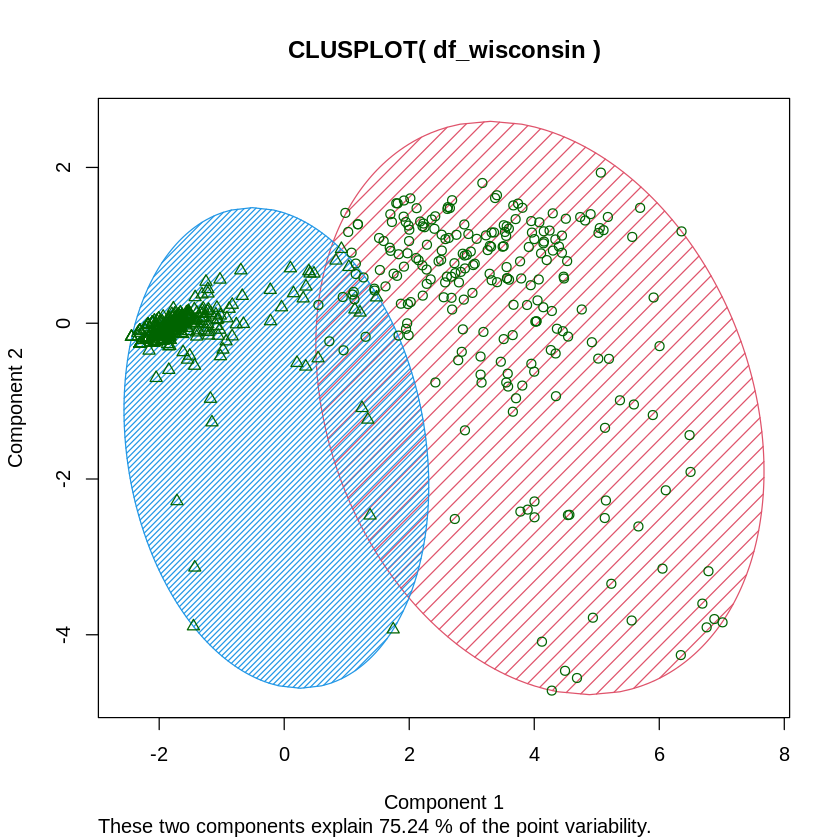

In [44]:
clusplot(df_wisconsin, cluster_2, color=T, shade=T, labels=0, lines=0)

### Hierarchical Clustering

In [45]:
#load packages
install.packages("dendextend") 
library(dendextend) 
install.packages("circlize") 
library(circlize)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘viridis’



---------------------
Welcome to dendextend version 1.15.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:rpart’:

    prune


The following object is masked from ‘package:stats’:

    cutree


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘GlobalOptions’, ‘shape’


circlize version 0.4.12
CRAN page: https://cran.r-project

In [46]:
train <- df_wisconsin[,1:9] 
label <- df_wisconsin[,10]

In [47]:
pr_train <- prcomp(train, scale = TRUE)
summary(pr_train)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.4289 0.88088 0.73434 0.67796 0.61667 0.54943 0.54259
Proportion of Variance 0.6555 0.08622 0.05992 0.05107 0.04225 0.03354 0.03271
Cumulative Proportion  0.6555 0.74172 0.80163 0.85270 0.89496 0.92850 0.96121
                           PC8     PC9
Standard deviation     0.51062 0.29729
Proportion of Variance 0.02897 0.00982
Cumulative Proportion  0.99018 1.00000

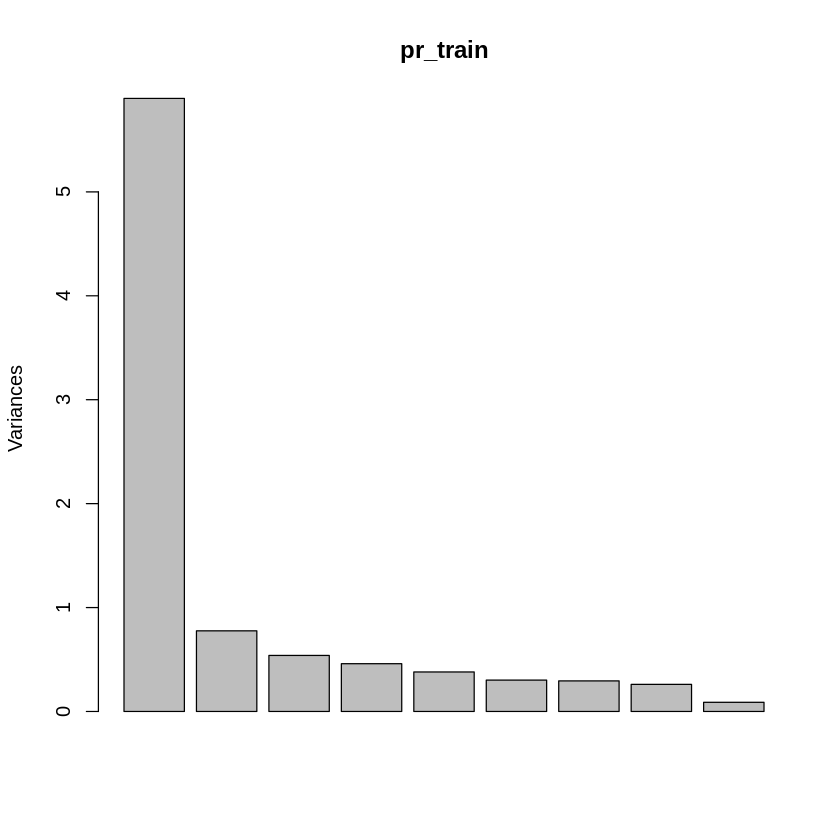

In [48]:
plot(pr_train)

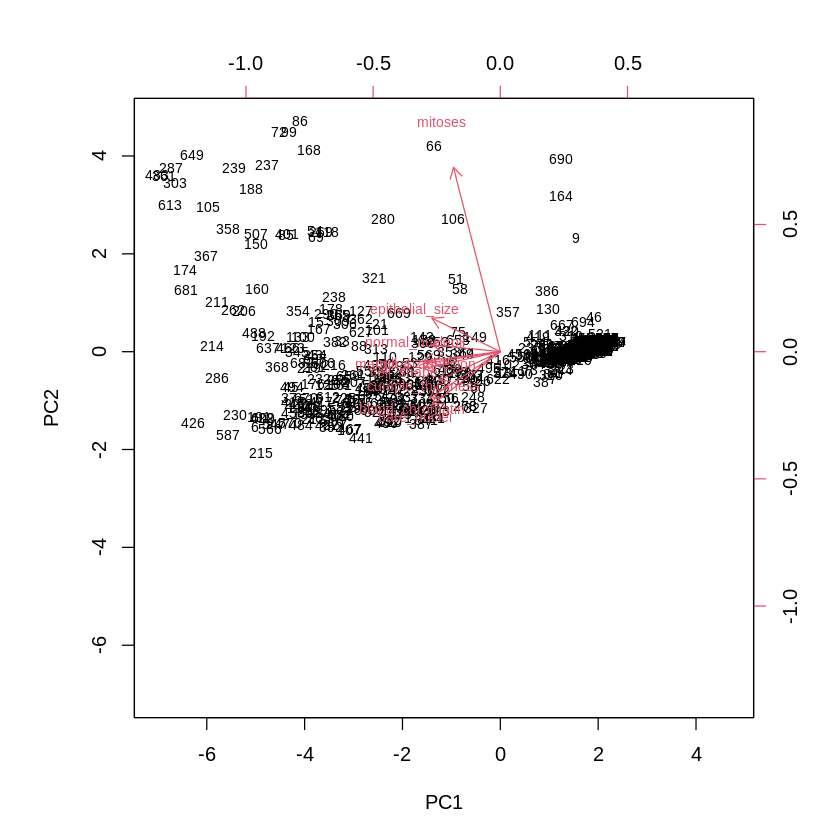

In [49]:
biplot(pr_train,scale=0, cex=.7)

In [50]:
dist_pca <- dist(pr_train$x[,1:2], method = "euclidean") 
#create a hierarchical cluster model: hclust_pca 
hclust_pca <- hclust(dist_pca, method = "complete") 

#get summary
summary(hclust_pca)
#get clusters from the model
clusters_pca2 <- cutree(hclust_pca , k = 2)

            Length Class  Mode     
merge       1364   -none- numeric  
height       682   -none- numeric  
order        683   -none- numeric  
labels       683   -none- character
method         1   -none- character
call           3   -none- call     
dist.method    1   -none- character

In [51]:
table(clusters_pca2, label)

             label
clusters_pca2   2   4
            1 432  12
            2  12 227

In [52]:
#get clusters from the model: 2 without pca 
scale_data <- scale(train)
dist_scale <- dist(scale_data)

hclustscale <- hclust(dist_scale, method = "complete")
summary(hclustscale)

clusters_2 <- cutree(hclustscale , k = 2)

            Length Class  Mode     
merge       1364   -none- numeric  
height       682   -none- numeric  
order        683   -none- numeric  
labels       683   -none- character
method         1   -none- character
call           3   -none- call     
dist.method    1   -none- character

In [53]:
table(clusters_2, label)

          label
clusters_2   2   4
         1 442  99
         2   2 140

### Classification Trees

In [54]:
#build classification tree
tree_model <- rpart(class ~., data = train_df, method = "class")
summary(tree_model)

Call:
rpart(formula = class ~ ., data = train_df, method = "class")
  n= 478 

          CP nsplit rel error    xerror       xstd
1 0.79768786      0 1.0000000 1.0000000 0.06073135
2 0.04046243      1 0.2023121 0.2254335 0.03459430
3 0.01734104      3 0.1213873 0.1965318 0.03248410
4 0.01000000      4 0.1040462 0.1907514 0.03203885

Variable importance
       cell_shape         cell_size   bland_chromatin   normal_nucleoli 
               21                18                16                14 
      bare_nuclei   epithelial_size  cumple_thickness marginal_adhesion 
               14                14                 1                 1 

Node number 1: 478 observations,    complexity param=0.7976879
  predicted class=2  expected loss=0.3619247  P(node) =1
    class counts:   305   173
   probabilities: 0.638 0.362 
  left son=2 (314 obs) right son=3 (164 obs)
  Primary splits:
      cell_shape      < 3.5 to the left,  improve=155.9178, (0 missing)
      cell_size       < 3.5 to the l

,class,,,,,,,,,,,,,cover
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,0.02,when,cell_shape,<,4,&,bland_chromatin,<,4,,,,,60%
10,0.18,when,cell_shape,<,4,&,bland_chromatin,>=,4,&,cumple_thickness,<,5,2%
6,0.33,when,cell_shape,>=,4,&,bland_chromatin,<,3,,,,,2%
11,0.94,when,cell_shape,<,4,&,bland_chromatin,>=,4,&,cumple_thickness,>=,5,3%
7,0.95,when,cell_shape,>=,4,&,bland_chromatin,>=,3,,,,,32%


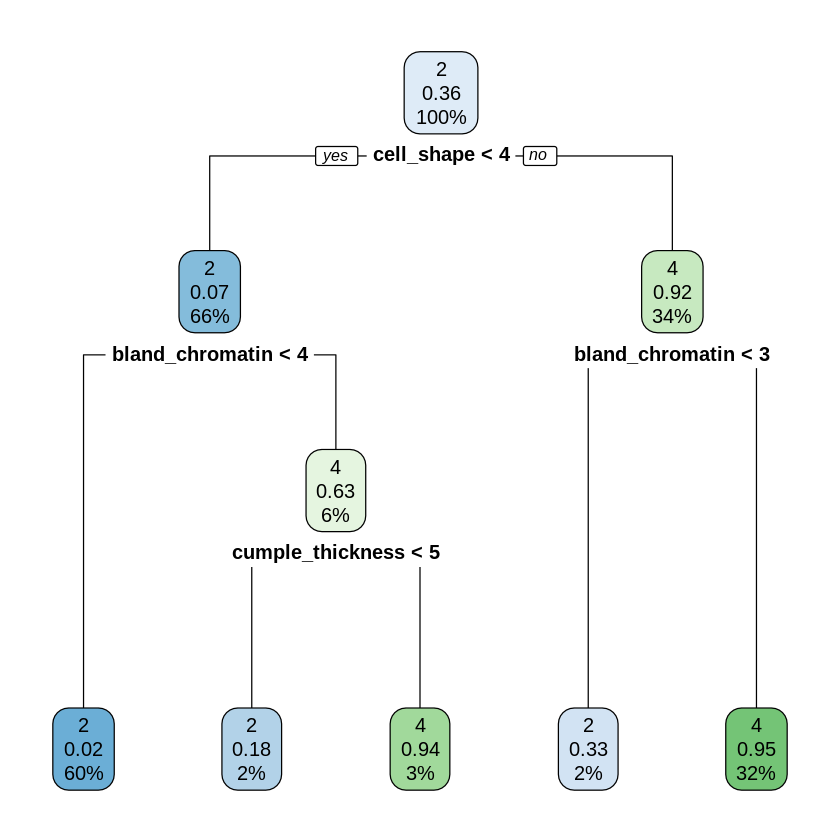

In [55]:
rpart.plot(tree_model, fallen.leaves = TRUE) 
rpart.rules(tree_model, cover = TRUE)

In [56]:
test_df$pred <- predict(tree_model, test_df, type = "class") 
test_df$pred

[1] 4 4 2 2 2 4 2 4 2 2 2 4 4 4 2 2 4 4 2 2 2 4 2 2 2 2 4 4 2 2 4 2 2 4 2 2 4
 [38] 2 2 2 2 4 2 2 2 2 2 2 2 4 2 4 4 4 4 4 2 2 4 2 2 2 4 4 2 4 4 4 4 4 4 2 4 2
 [75] 2 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 4 2 4 4 2 4 2 2 2 4 4 2 2 2 2 2 2 4 2
[112] 2 2 2 2 2 4 2 4 2 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 4 2 2 4 4 4 2 2 4 4 2 2 2 2
[186] 2 2 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2
Levels: 2 4

In [57]:
mean(test_df$pred == test_df$class)

[1] 0.9317073

### Bagged Trees

In [58]:
library(ipred)

In [59]:
model <- bagging(formula = class ~., 
                        data = train_df,
                        coob = TRUE)
model


Bagging classification trees with 25 bootstrap replications 

Call: bagging.data.frame(formula = class ~ ., data = train_df, coob = TRUE)

Out-of-bag estimate of misclassification error:  0.0356 


In [60]:
pred <- predict(object = model, 
                newdata = test_df,  
                type = "class") 
print(pred)

  [1] 4 4 2 2 2 4 2 4 2 2 4 4 4 4 4 4 4 4 2 2 2 4 2 2 2 2 4 4 2 2 4 2 2 4 2 2 4
 [38] 2 2 2 2 4 2 2 2 2 2 2 2 4 4 4 4 4 4 4 2 2 4 2 2 2 4 4 2 4 4 4 4 4 4 2 4 2
 [75] 2 4 2 4 4 2 2 2 4 4 2 4 2 2 2 2 4 2 4 2 4 4 2 4 2 2 2 4 4 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 4 2 4 4 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 4 2 2 4 4 4 2 2 2 4 2 2 2 2
[186] 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2
Levels: 2 4


In [61]:
confusionMatrix(data = pred,       
                reference = test_df$class) 

Confusion Matrix and Statistics

          Reference
Prediction   2   4
         2 136   1
         4   3  65
                                          
               Accuracy : 0.9805          
                 95% CI : (0.9508, 0.9947)
    No Information Rate : 0.678           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9557          
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9784          
            Specificity : 0.9848          
         Pos Pred Value : 0.9927          
         Neg Pred Value : 0.9559          
             Prevalence : 0.6780          
         Detection Rate : 0.6634          
   Detection Prevalence : 0.6683          
      Balanced Accuracy : 0.9816          
                                          
       'Positive' Class : 2               
                              

In [62]:
model$mtrees[1]

[[1]]
$bindx
  [1] 452  75 330  96   5 167  24  92 421 419 241 295 392  11 414 455 281 123
 [19]  45 386 478 411  68 143 108 463 286   5  53 179 473 436 408  99 466   3
 [37]  36 380 154 419  70 193 266   2 442 232  94  69 203 205 439  82 374 466
 [55] 184 307 301 393 224 342  52 303  37 443 401 405 118 321 373 339 468  95
 [73] 270 333  62  37 131 415 234 215  38 153 358   3 225  84 259  40 196  88
 [91] 173  56 165 388 387 126 359 140 387  90  28 278 410 314 292  45 262 107
[109] 229 355 459  13 452 232 456 125  92 395 384 385 102 328 309 392  31 196
[127] 232 244 105  53 471 470 127 290 166 124 435 108 104 299 464  83 341  20
[145]  29 455 182 298 291 351 419 375 332 435  30 381 113  19  88  83   9  53
[163] 182 442 220 389 455 458 476 372  12 372 417 279 346 242 220 209 432 360
[181] 345  27 212 343 466 282 450 206 317 332 434 340 302 328 195   8 331 458
[199] 396  58 249 194 286  77 258 323 376  50  17 118 235 431 107 402  50  67
[217] 300 387 477 359   2 188 184 133 414 188  23 3

### Random Forest

In [63]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [64]:
rf_model <- randomForest(class ~., data = train_df,  mtry = 3, importance = TRUE)
rf_model
# Predict outcomes
rf_pred <- predict(rf_model, newdata = test_df)
rf_pred


Call:
 randomForest(formula = class ~ ., data = train_df, mtry = 3,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.51%
Confusion matrix:
    2   4 class.error
2 298   7  0.02295082
4   5 168  0.02890173

2   4   5   9  11  19  20  22  30  32  40  44  45  47  51  52  57  66  71  80 
  4   4   2   2   2   4   2   4   2   2   4   4   4   4   4   4   4   4   2   2 
 81  86  89  95  97  98 100 101 102 103 107 121 122 123 130 132 133 136 138 141 
  2   4   2   2   2   2   4   4   2   2   4   2   2   4   2   2   4   2   2   2 
144 147 148 151 154 157 163 166 171 174 180 185 187 188 189 191 198 200 202 205 
  2   4   2   2   2   2   2   2   2   4   4   4   4   4   4   4   2   2   4   2 
209 213 214 215 217 219 225 227 228 234 240 243 248 249 251 254 259 260 264 270 
  2   2   4   4   2   4   4   4   4   4   4   2   4   2   2   4   2   4   4   2 
278 279 283 287 291 294 304 311 312 315 321 326 331 332 334 335 339 341 346 347 
  2   2   4   4   2   4   2   2   2   2   4   2   4   2   4   4   2   4   2   2 
351 358 361 372 373 374 376 378 379 380 381 398 399 402 406 418 422 425 426 437 
  2   4   4   2   2   2   2   2   2   2   2   2   2   2   2   2   4   2   4   4 
441 444 457 458 459 460 462 463 467 471 475 476 477 479 485 488 489 491 492 493 
  4   2   4   4   2   2   2   2   4   2   2   2   2   2   2   4   4   2   4   2 
497 499 502 503 504 508 512 513 517 525 528 529 533 534 536 539 544 548 549 551 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
554 555 557 564 565 568 572 574 575 577 580 593 596 603 609 611 612 615 620 622 
  2   2   2   2   2   2   4   2   4   2   2   4   2   2   4   4   4   2   2   2 
627 629 630 635 638 641 642 647 649 650 653 656 658 660 667 673 675 685 686 687 
  4   2   2   2   2   2   2   2   4   2   2   2   4   2   2   2   2   2   2   2 
688 690 692 694 695 
  2   2   4   2   2 
Levels: 2 4

In [65]:
mean(rf_pred == test_df$class)                    
table(rf_pred,test_df$class)

[1] 0.9756098

       
rf_pred   2   4
      2 135   1
      4   4  65

,2,4,MeanDecreaseAccuracy,MeanDecreaseGini
cumple_thickness,13.050927,17.913811,20.000199,9.887085
cell_size,15.295814,13.806103,20.247598,44.127090
cell_shape,10.117251,16.353097,19.529347,54.615884
marginal_adhesion,8.096098,3.083961,8.747800,5.828063
epithelial_size,10.155843,9.548855,13.299030,25.427364
bare_nuclei,21.264441,21.591868,26.344624,37.829575
bland_chromatin,9.704500,14.359793,17.610595,18.473760
normal_nucleoli,11.921510,9.939862,14.547033,21.777619
mitoses,7.838543,3.102051,8.105719,2.175800


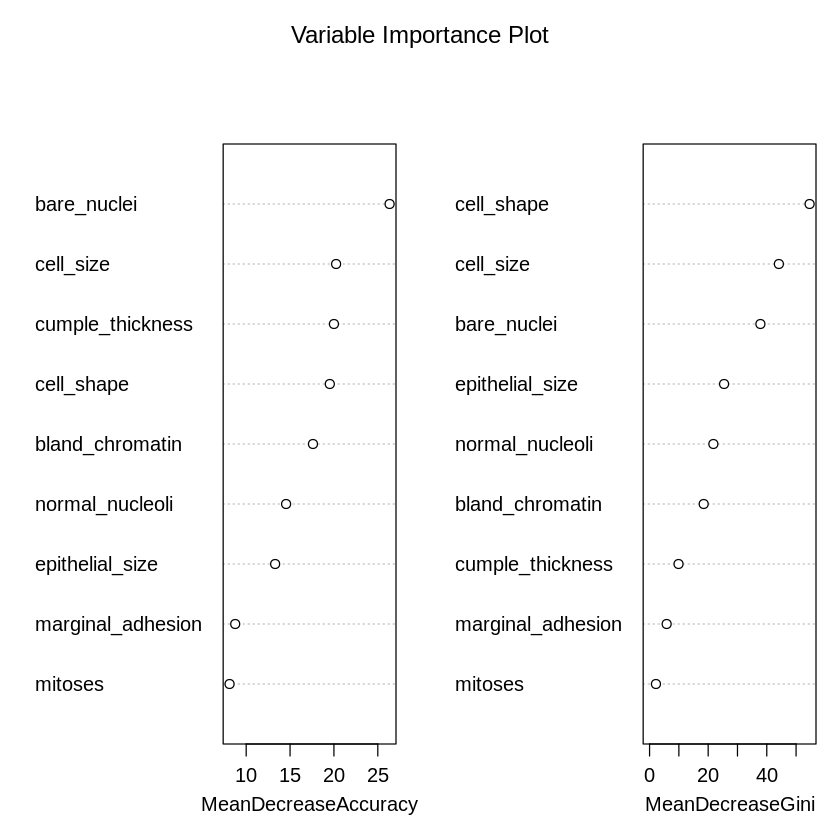

In [66]:
importance(rf_model)
varImpPlot(rf_model, main = "Variable Importance Plot")

### Deep Neural Network

In [71]:
install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘config’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [72]:
install.packages("mltools")
library(keras)
library(mltools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na


The following object is masked from ‘package:e1071’:

    skewness




In [73]:
library(data.table)
onehot_train <- one_hot(as.data.table(train_df$class))
onehot_test <- one_hot(as.data.table(test_df$class))

y_train <- as.matrix(onehot_train)
y_test <- as.matrix(onehot_test)


Attaching package: ‘data.table’


The following object is masked from ‘package:dendextend’:

    set


The following object is masked from ‘package:naivebayes’:

    tables


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [74]:
X_train = as.matrix(train_df[,1:9])
X_test = as.matrix(test_df[,1:9])

In [75]:
dim(X_train) 
dim(X_test)
dim(y_train)

[1] 478   9

[1] 205   9

[1] 478   2

In [76]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 64, 
              activation = 'relu', 
              input_shape = c(478,9)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_dense(units = 24, activation = 'relu') %>%
  layer_dropout(rate = 0.25) %>%
  layer_dense(units = 16, activation = 'relu') %>%
  layer_dropout(rate = 0.25) %>%
  layer_dense(units = 2, activation = 'softmax')

summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_3 (Dense)                     (None, 478, 64)                 640         
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 478, 64)                 0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 478, 24)                 1560        
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 478, 24)                 0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 478, 16)                 400         
________________________________________________________________________________
dropout 

In [77]:
#compile and fit the model
model %>% compile(
     loss = 'binary_crossentropy',
      optimizer = optimizer_rmsprop(),
      metrics = c('accuracy')
 )


In [78]:
# Fit the model 
model %>% fit(
     X_train, 
     y_train, 
     epochs = 5, batch_size = 32, verbose = 1, 
     validation_split = 0.1
 )

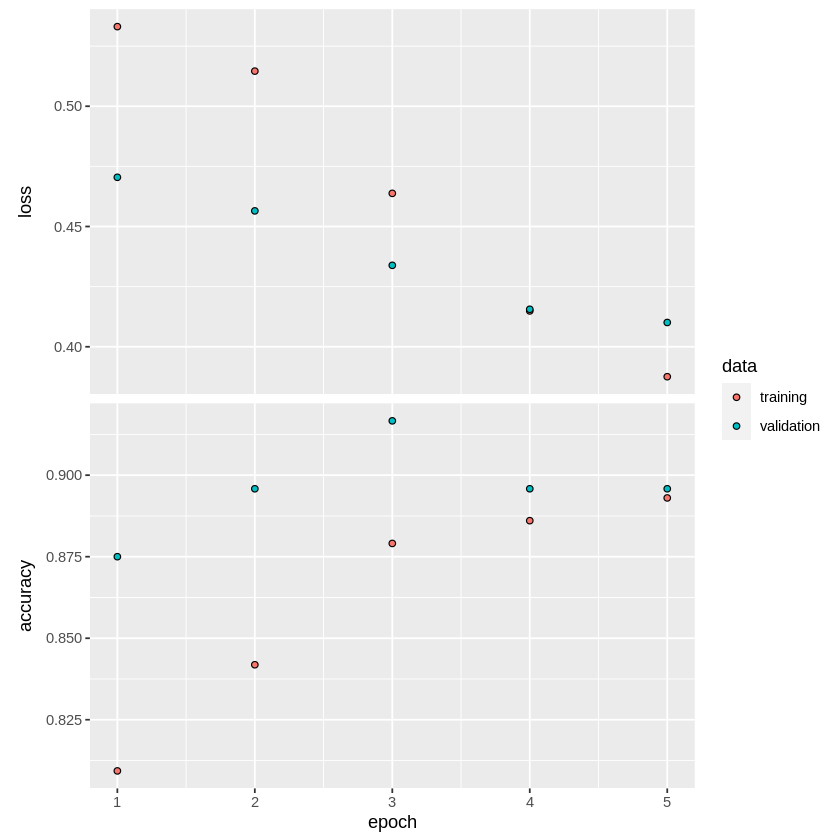

In [79]:
history <- model %>% fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split = 0.1)
plot(history)

In [80]:
# Evaluate the model
score <- model %>% evaluate(X_test, y_test, batch_size = 128)

# Print the score
print(score)

     loss  accuracy 
0.2952179 0.9512195 


In [81]:
model_1 <- keras_model_sequential() 
model_1 %>% 
  layer_dense(units = 8, 
              activation = 'relu', 
              input_shape = c(478,9)) %>% 
  layer_dense(units = 4, activation = 'relu') %>%
  layer_dense(units = 2, activation = 'softmax')

summary(model_1)

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_6 (Dense)                     (None, 478, 8)                  80          
________________________________________________________________________________
dense_5 (Dense)                     (None, 478, 4)                  36          
________________________________________________________________________________
dense_4 (Dense)                     (None, 478, 2)                  10          
Total params: 126
Trainable params: 126
Non-trainable params: 0
________________________________________________________________________________


In [82]:
#compile and fit the model
model_1 %>% compile(
     loss = 'binary_crossentropy',
      optimizer = optimizer_rmsprop(),
      metrics = c('accuracy')
 )

In [83]:
# Fit the model 
model_1 %>% fit(
     X_train, 
     y_train, 
     epochs = 10, batch_size = 32, verbose = 1, 
     validation_split = 0.1
 )

`geom_smooth()` using formula 'y ~ x'



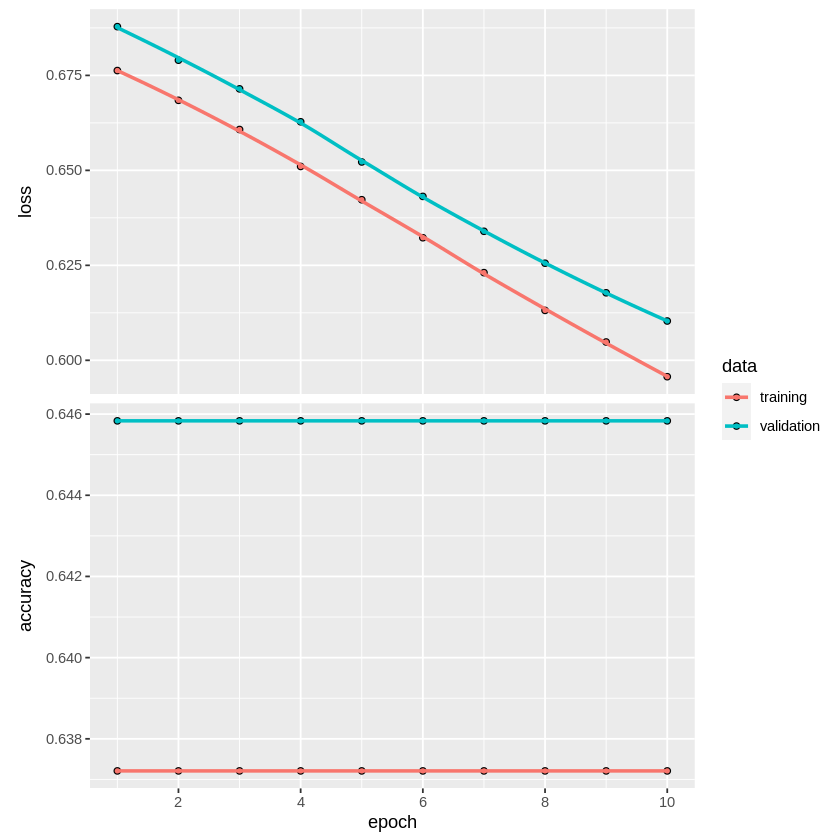

In [84]:
history_1 <- model_1 %>% fit(X_train, y_train, epochs = 10, 
                        batch_size = 32, validation_split = 0.1)
plot(history_1)

In [85]:
# Evaluate the model
score <- model_1 %>% evaluate(X_test, y_test, batch_size = 32)

# Print the score
print(score)

     loss  accuracy 
0.5710918 0.6780488 
